In [13]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel
from spice.spectrum import simulate_spectrum
from transformer_payne import Blackbody, TransformerPayne
from phoebe.parameters.dataset import _mesh_columns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from jax import config
config.update('jax_platform_name', 'cpu')
config.update("jax_enable_x64", True)

In [14]:
b = phoebe.default_binary()
times = np.linspace(0, 2, 10)
COLUMNS = _mesh_columns
b.set_quantity('period@binary', 1)
b.set_quantity('incl@binary', 15)
b.add_dataset('mesh', times=times, columns=COLUMNS, dataset='mesh01')
b.add_dataset('orb', compute_times=times, dataset='orb01')
b.add_dataset('lc', compute_times=times, dataset='lc01')
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', 'manual')
b.run_compute(irrad_method='none', coordinates='uvw', ltte=False)
bb = TransformerPayne.download()

100%|██████████| 10/10 [00:00<00:00, 77.61it/s]


In [15]:
from spice.models.binary import PhoebeBinary
from spice.models.phoebe_utils import PhoebeConfig
import matplotlib.pyplot as plt

#bb = Blackbody()

p1 = PhoebeConfig(b, 'mesh01', 'orb01')
pb = PhoebeBinary.construct(p1, bb.stellar_parameter_names, {pn: sp for pn, sp in zip(bb.stellar_parameter_names, bb.solar_parameters)})

In [16]:
import pickle
with open('phoebe_binary.pkl', 'wb') as f:
    pickle.dump(pb, f)

In [17]:
from spice.models.binary import evaluate_orbit
pbs = [evaluate_orbit(pb, t) for t in times]

In [18]:
pbs[0][0].mus.shape

(1740,)

In [19]:
pbs[0][0].centers.shape

(1740, 3)

In [20]:
pbs[0][0].parameters.shape

(1740, 94)

In [21]:
bb.stellar_parameter_names

['logteff',
 'logg',
 'vmic',
 'He',
 'Li',
 'Be',
 'B',
 'C',
 'N',
 'O',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca',
 'Sc',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zn',
 'Ga',
 'Ge',
 'As',
 'Se',
 'Br',
 'Kr',
 'Rb',
 'Sr',
 'Y',
 'Zr',
 'Nb',
 'Mo',
 'Tc',
 'Ru',
 'Rh',
 'Pd',
 'Ag',
 'Cd',
 'In',
 'Sn',
 'Sb',
 'Te',
 'I',
 'Xe',
 'Cs',
 'Ba',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Pm',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu',
 'Hf',
 'Ta',
 'W',
 'Re',
 'Os',
 'Ir',
 'Pt',
 'Au',
 'Hg',
 'Tl',
 'Pb',
 'Bi',
 'Po',
 'At',
 'Rn',
 'Fr',
 'Ra',
 'Ac',
 'Th',
 'Pa',
 'U']

In [22]:
ws = np.linspace(4000, 10000, 10)
s1s = [simulate_spectrum(bb.intensity, pb1, np.log10(ws), disable_doppler_shift=True) for pb1, _ in pbs]
s2s = [simulate_spectrum(bb.intensity, pb2, np.log10(ws), disable_doppler_shift=True) for _, pb2 in pbs]

(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))
(array(1024), array(94))


XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/interpreters/mlir.py(2446): _wrapped_callback
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/interpreters/pxla.py(1201): __call__
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/profiler.py(336): wrapper
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/pjit.py(1348): _pjit_call_impl_python
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/pjit.py(1392): call_impl_cache_miss
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/pjit.py(1409): _pjit_call_impl
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/core.py(913): process_primitive
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/core.py(423): bind_with_trace
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/core.py(2727): bind
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/pjit.py(143): _python_pjit_helper
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/pjit.py(248): cache_miss
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_5547/2804921035.py(2): <listcomp>
  /var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_5547/2804921035.py(2): <module>
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3526): run_code
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3466): run_ast_nodes
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3284): run_cell_async
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3079): _run_cell
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3024): run_cell
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/zmqshell.py(546): run_cell
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/ipkernel.py(422): do_execute
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/kernelbase.py(740): execute_request
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/kernelbase.py(412): dispatch_shell
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/kernelbase.py(505): process_one
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/kernelbase.py(516): dispatch_queue
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/asyncio/events.py(80): _run
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/asyncio/base_events.py(1909): _run_once
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/asyncio/base_events.py(604): run_forever
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/tornado/platform/asyncio.py(195): start
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel/kernelapp.py(736): start
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/traitlets/config/application.py(992): launch_instance
  /Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/ipykernel_launcher.py(17): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


In [13]:
bb.min_parameters.shape

(95,)

In [7]:
diffs_phoebe = -2.5*np.log10(b.get_parameter('fluxes@lc01@model').value)

In [8]:
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import GaiaG

In [9]:
gaia_g = GaiaG()

In [10]:
lums = [AB_passband_luminosity(gaia_g, ws, s1[:, 0]+s2[:, 0]) for s1, s2 in zip(s1s, s2s)]

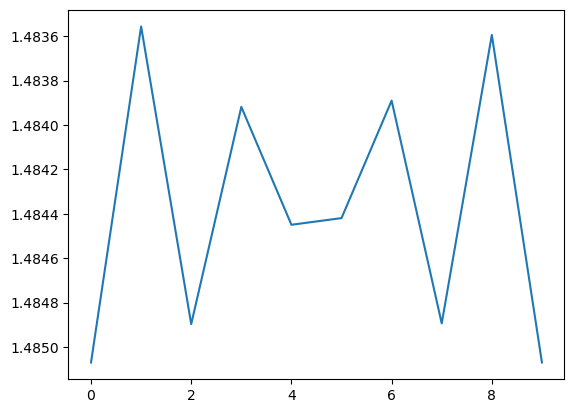

In [11]:
plt.plot(lums)
plt.gca().invert_yaxis()

In [12]:
diffs_phoebe = diffs_phoebe-diffs_phoebe[0]
diffs_spice = np.array(lums)-lums[0]

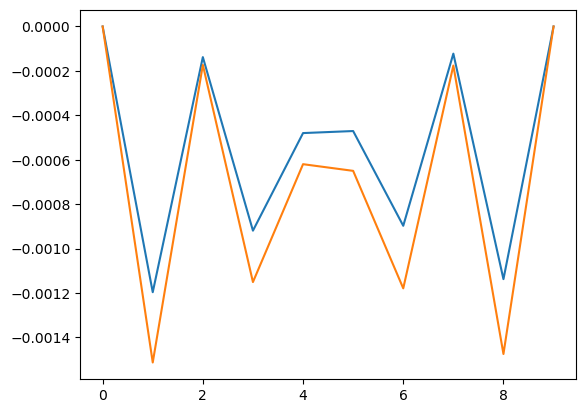

In [13]:
plt.plot(diffs_phoebe)
plt.plot(diffs_spice)
plt.show()

0.0035

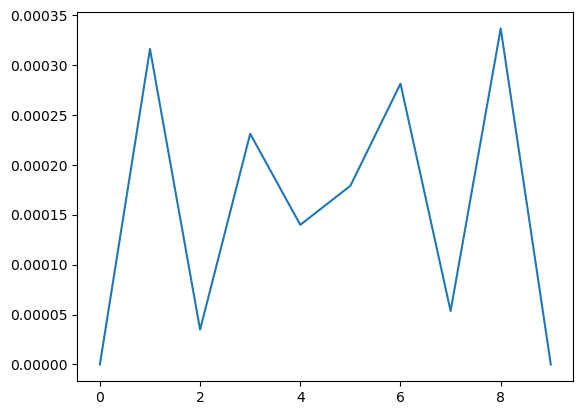

In [14]:
plt.plot(diffs_phoebe-diffs_spice)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


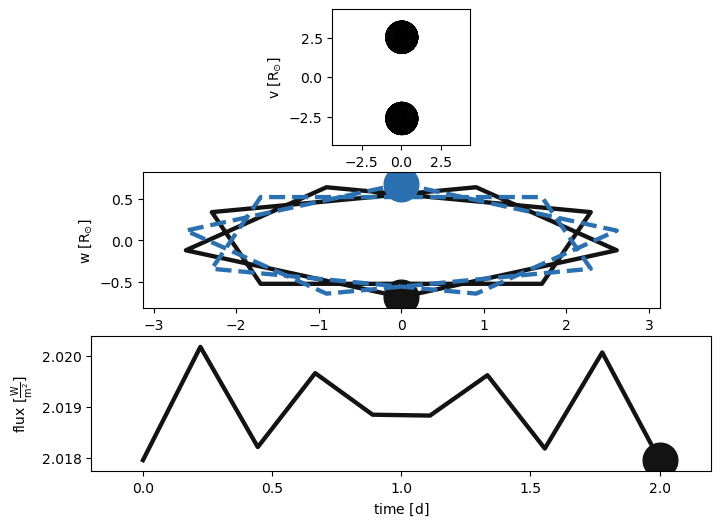

In [15]:
afig, mplanim = b.plot(y={'orb': 'ws'}, 
                       animate=True, save='animations_1.gif', save_kwargs={'writer': 'imagemagick'})